# Conférences Python Master TIDE #4

## NumPy

1. Introduction
2. ndarrays
3. Accès et modification de valeurs
4. Tri
5. Sélection logique de valeurs
6. Concaténation
7. Fonctions universelles
8. Broadcasting
9. Sauvegarder et charger des arrays
10. Exemples avec des images

&copy; 2025 Francis Wolinski

## 1. Introduction

- **NumPy** est le premier package de traitement de données en Python
- Il est basé sur un ensemble de fonctions codées en langage C
- Il combine une classe, les ndarray, et des fonctions universelles
- Il est le socle de la plupart des packages de data science

Numpy sert également de base pour :
- La librairie **pandas** qui l'utilise pour les Series et les DataFrames.
- Une autre implémentation dans la librairie **PyTorch** pour représenter des tenseurs utilisés dans les réseaux de neurones et le deep learning.

In [1]:
# import
import numpy as np
import matplotlib.pyplot as plt

## 2. ndarrays

**NumPy** utilise des ndarray
- un array à une dimension est un vecteur
- un array à deux dimensions est une matrice
- un array à trois dimensions et plus est un tenseur

On utilise aussi les arrays pour travailler sur des données non structurées :
- une image est représentée par un array à 3 dimensions
- une vidéo est représentée par un array à 4 dimensions
- etc.

### Un peu de vocabulaire

- Le nombre de dimensions est accédé avec `.ndim`
- Le nombre d'éléments dans chaque dimension est accédé avec `.shape`
- Le nombre total d’éléments d’un array est accédé avec `.size`
- Le type des données est accédé avec `.dtype`
- Les dimensions sont appelées `axis` (`axis=0` : lignes, `axis=1` : colonnes, ...)

On peut générer des arrays de différentes manières :

fonction (extrait)|usage
-|-
np.array(object)|à partir d'un objet de type tableau
np.arange(start, stop, step)|vecteur d'entiers également répartis dans un intervalle avec un pas
np.linspace(start, stop, num)|vecteur de nombres également répartis dans un intervalle
np.logspace(start, stop, num)|vecteur de nombres également répartis sur une échelle log dans un intervalle
np.zeros(shape)|retourne un *ndarray* nul
np.zeros_like(array)|retourne un *ndarray* nul aux dimensions identiques d'un autre *ndarray*
np.ones(shape)|retourne un *ndarray* unité
np.ones_like(array)|retourne un *ndarray* unité aux dimensions identiques d'un autre *ndarray*
np.identity(shape)|retourne une matrice identité
np.eye(N, M, k)|retourne une matrice nulle avec des 1 sur une diagonale
np.full(shape)|retourne une matrice avec une valeur uniforme
np.random.rand(d0, d1, ..., dn)|matrice aléatoire uniforme dans [0, 1)
np.random.random(size)|matrice aléatoire uniforme dans [0, 1)
np.random.randn(size)|matrice aléatoire nomale
np.random.randint(low, high, size)|matrice aléatoire d'entiers

#### Création explicite

In [2]:
# un array
arr1 = np.array([[1, 2, 3], [4, 5, 6]])
print(arr1)

[[1 2 3]
 [4 5 6]]


In [3]:
# attributs
print(arr1.ndim, arr1.shape, arr1.size, arr1.dtype)

2 (2, 3) 6 int64


#### Fonction arange

In [4]:
# arange
arr2 = np.arange(48, dtype="int8")
arr2

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int8)

In [5]:
# attributs
print(arr2.ndim, arr2.shape, arr2.size, arr2.dtype)

1 (48,) 48 int8


La méthode `.reshape(shape)` permet de modifier la structure d'un array sans changer le nombre d'éléments.

Les méthodes, dîtes de *reshaping*, sont très importantes en Data Science, on en verra avec la librairie **pandas**.

In [6]:
# reshape
arr2 = arr2.reshape(8, 6)
arr2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]], dtype=int8)

In [7]:
# attributs
print(arr2.ndim, arr2.shape, arr2.size, arr2.dtype)

2 (8, 6) 48 int8


- Quelle autre dimension aurait-on pu choisir pour cet array ?

In [10]:
arr2 = arr2.reshape((4, 4, 3))
arr2

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]], dtype=int8)

La méthode `.flatten()` permet de mettre à plat la structure d'un array sans changer le nombre d'éléments.

In [11]:
# arr2
arr2

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]],

       [[24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]]], dtype=int8)

In [12]:
# mise à plat ligne par ligne (langage C)
arr2.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47], dtype=int8)

In [13]:
# mise à plat colonne par colonne (langage Fortran)
arr2.flatten('F')

array([ 0, 12, 24, 36,  3, 15, 27, 39,  6, 18, 30, 42,  9, 21, 33, 45,  1,
       13, 25, 37,  4, 16, 28, 40,  7, 19, 31, 43, 10, 22, 34, 46,  2, 14,
       26, 38,  5, 17, 29, 41,  8, 20, 32, 44, 11, 23, 35, 47], dtype=int8)

#### Fonction linspace

La fonction `np.linspace()` est utile par exemple pour tracer des fonctions. Elle génère un nombre donné de valeurs équidistantes entre deux bornes.

In [14]:
# linspace : 11 valeurs entre 0 et 5
np.linspace(0, 5, 11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

- Si l'on veut un certain nombre d'intervalles, il faut rajouter 1 pour le nombre de valeurs totales.

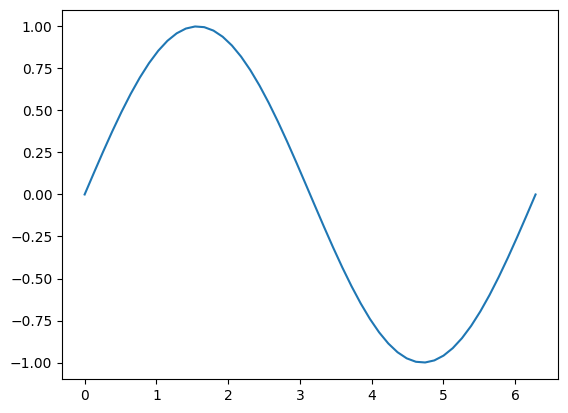

In [17]:
# linspace : affichage de la fonction sinus sur 50 valeurs entre 0 et 2xpi
x = np.linspace(0, 2 * np.pi, 50)
y = np.sin(x)
plt.plot(x, y);

#### nombres aléatoires

Il existe dans **NumPy** un générateur de nombres pseudo-aléatoires. Les nombres aléatoires sont utilisés dans plusieurs branches de l'informatique : certains algorithmes (tri, optimisation, ...), la cryptographie, les simulations, les jeux vidéos, ainsi que le Machine Learning et le Deep Learning.

Rappel : `np.random.seed()` : permet d'initialiser le générateur afin de pouvoir reproduire des expériences avec des nombres aléatoires. A noter, certaines méthodes de Machine Learning utilisent le mot-clé `random_state` pour définir un seed et être en mesure de pouvoir reproduire des expériences.

In [18]:
# 1 entier aléatoire entre 0 et 9
np.random.randint(10)

9

In [19]:
# 20 entiers aléatoires entre 1 et 10 dans une matrice 2 x 10
np.random.randint(1, 11, (2, 10))

array([[ 8,  9,  6,  3,  6,  6,  7,  7,  2,  6],
       [ 5,  8,  1,  1,  7,  7,  4, 10,  8,  9]])

In [20]:
# 12 flottants aléatoires entre 0.0 et 1.0 dans une matrice 3 x 4
np.random.rand(3, 4)

array([[0.13495292, 0.09991398, 0.92672973, 0.65835192],
       [0.64965316, 0.65908004, 0.09623056, 0.14894784],
       [0.60491612, 0.86281121, 0.56188234, 0.12828917]])

In [21]:
# avec seed
np.random.seed(0)
np.random.rand(3, 4)

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318],
       [0.4236548 , 0.64589411, 0.43758721, 0.891773  ],
       [0.96366276, 0.38344152, 0.79172504, 0.52889492]])

In [ ]:
# ML random_state=seed

#### ajouter une dimension à un array

- La méthode `.reshape()` peut prendre la valeur `-1` qui signifie que **NumPy** doit définir lui-même la bonne dimension.
- L'objet `np.newaxis` permet de matérialiser une dimension supplémentaire.

In [22]:
# ajout d'une dimension
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
# ajout d'une dimension
arr2 = arr.reshape(arr.shape[0], -1).T
arr2

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [24]:
# shape
print(arr2.shape)

(1, 10)


In [25]:
# équivalent
np.array([arr])

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [26]:
# équivalent
arr[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [27]:
# ajout d'une dimension
arr = np.arange(10)
arr3 = arr.reshape(arr.shape[0], -1)
arr3

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [28]:
# shape
print(arr3.shape)

(10, 1)


In [29]:
# équivalent
np.array([arr]).T

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [30]:
# équivalent
arr[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

## 3. Accès et modification de valeurs

L'opérateur `[]` en suffixe permet d'accéder aux valeurs et aussi de modifier les valeurs d'un array.

Les sélecteurs utilisables sont les mêmes que ceux en Python :
- un indice `array[i]` commençant à 0.
- une plage d'indices `array[i:j]` dans laquelle le second est exclu.
- une plage d'indices avec un pas `array[i:j:k]`.

Si un array a plusieurs dimensions, on peut mettre autant de sélecteurs séparés par des virgules que de dimensions.

In [31]:
arr2 = np.arange(48)
arr2 = arr2.reshape(8, 6)
arr2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

In [32]:
# accès à la première ligne
arr2[0]

array([0, 1, 2, 3, 4, 5])

In [33]:
# accès à la deuxième colonne
arr2[:, 1]

array([ 1,  7, 13, 19, 25, 31, 37, 43])

In [34]:
# lignes de 2 à 4
arr2[2:5]

array([[12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29]])

In [35]:
# colonnes de 2 à 3
arr2[:, 2:4]

array([[ 2,  3],
       [ 8,  9],
       [14, 15],
       [20, 21],
       [26, 27],
       [32, 33],
       [38, 39],
       [44, 45]])

In [36]:
# accès à une sous-matrice
arr2[2:5, 2:4]

array([[14, 15],
       [20, 21],
       [26, 27]])

In [37]:
# modification d'une sous-matrice
arr2[2:5, 2:4] = -1
arr2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, -1, -1, 16, 17],
       [18, 19, -1, -1, 22, 23],
       [24, 25, -1, -1, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

## 4. Tri

La fonction `np.sort()` permet de trier un ndarray.

In [38]:
# arr3
arr3 = np.random.random((5, 5))
arr3

array([[0.56804456, 0.92559664, 0.07103606, 0.0871293 , 0.0202184 ],
       [0.83261985, 0.77815675, 0.87001215, 0.97861834, 0.79915856],
       [0.46147936, 0.78052918, 0.11827443, 0.63992102, 0.14335329],
       [0.94466892, 0.52184832, 0.41466194, 0.26455561, 0.77423369],
       [0.45615033, 0.56843395, 0.0187898 , 0.6176355 , 0.61209572]])

In [39]:
# tri numpy
np.sort(arr3)

array([[0.0202184 , 0.07103606, 0.0871293 , 0.56804456, 0.92559664],
       [0.77815675, 0.79915856, 0.83261985, 0.87001215, 0.97861834],
       [0.11827443, 0.14335329, 0.46147936, 0.63992102, 0.78052918],
       [0.26455561, 0.41466194, 0.52184832, 0.77423369, 0.94466892],
       [0.0187898 , 0.45615033, 0.56843395, 0.61209572, 0.6176355 ]])

In [40]:
# arr4
np.random.seed(2025)
arr4 = np.random.randint(0, 10, (9, 9))
arr4

array([[2, 8, 3, 3, 0, 6, 8, 5, 1],
       [8, 5, 7, 5, 4, 0, 0, 5, 3],
       [4, 9, 1, 0, 7, 0, 1, 9, 3],
       [9, 4, 5, 5, 4, 9, 5, 5, 4],
       [1, 7, 5, 4, 8, 7, 6, 8, 8],
       [2, 8, 6, 9, 7, 5, 2, 9, 0],
       [2, 4, 0, 2, 0, 1, 6, 6, 4],
       [7, 3, 6, 3, 4, 0, 4, 9, 5],
       [9, 2, 0, 0, 1, 6, 7, 7, 9]])

In [41]:
# tri numpy
np.sort(arr4, axis=0)

array([[1, 2, 0, 0, 0, 0, 0, 5, 0],
       [2, 3, 0, 0, 0, 0, 1, 5, 1],
       [2, 4, 1, 2, 1, 0, 2, 5, 3],
       [2, 4, 3, 3, 4, 1, 4, 6, 3],
       [4, 5, 5, 3, 4, 5, 5, 7, 4],
       [7, 7, 5, 4, 4, 6, 6, 8, 4],
       [8, 8, 6, 5, 7, 6, 6, 9, 5],
       [9, 8, 6, 5, 7, 7, 7, 9, 8],
       [9, 9, 7, 9, 8, 9, 8, 9, 9]])

In [42]:
# tri numpy
np.sort(arr4, axis=1)

array([[0, 1, 2, 3, 3, 5, 6, 8, 8],
       [0, 0, 3, 4, 5, 5, 5, 7, 8],
       [0, 0, 1, 1, 3, 4, 7, 9, 9],
       [4, 4, 4, 5, 5, 5, 5, 9, 9],
       [1, 4, 5, 6, 7, 7, 8, 8, 8],
       [0, 2, 2, 5, 6, 7, 8, 9, 9],
       [0, 0, 1, 2, 2, 4, 4, 6, 6],
       [0, 3, 3, 4, 4, 5, 6, 7, 9],
       [0, 0, 1, 2, 6, 7, 7, 9, 9]])

## 5. Sélection logique de valeurs

### 5.1 Masques booléens

Un array permet également la sélection booléenne en plaçant entre `[]` des opérations booléennes sur ses éléments.

Lorsque l'array a plusieurs dimensions, les données sélectionnées sont mises à plat.

Le ET logique est représenté par un `&`, le OU logique par un `|` et le NON logique par un `~` .

In [43]:
# array d'entiers
array = np.arange(48)
array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [44]:
# création d'un masque booléen pour les entiers pairs
mask = array % 2 == 0
mask

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False])

In [45]:
# opération booléenne sur un array de dimension 1
# sélection des entiers pairs à partir du masque booléen
array[mask]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46])

In [46]:
# en une seule ligne de code
array[array % 2 == 0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46])

In [47]:
# arr4
arr4

array([[2, 8, 3, 3, 0, 6, 8, 5, 1],
       [8, 5, 7, 5, 4, 0, 0, 5, 3],
       [4, 9, 1, 0, 7, 0, 1, 9, 3],
       [9, 4, 5, 5, 4, 9, 5, 5, 4],
       [1, 7, 5, 4, 8, 7, 6, 8, 8],
       [2, 8, 6, 9, 7, 5, 2, 9, 0],
       [2, 4, 0, 2, 0, 1, 6, 6, 4],
       [7, 3, 6, 3, 4, 0, 4, 9, 5],
       [9, 2, 0, 0, 1, 6, 7, 7, 9]])

In [48]:
# opération booléenne sur un array de dimension 2
# les entiers pairs
arr4[arr4 % 2 == 0]

array([2, 8, 0, 6, 8, 8, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 8, 6, 8, 8, 2, 8,
       6, 2, 0, 2, 4, 0, 2, 0, 6, 6, 4, 6, 4, 0, 4, 2, 0, 0, 6])

In [49]:
# opération booléenne complexe sur un array de dimension 2
# les entiers pairs dont le carré est inférieur à 50
arr4[(arr4 % 2 == 0) & (arr4 ** 2 < 50)]

array([2, 0, 6, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 6, 2, 6, 2, 0, 2, 4, 0, 2,
       0, 6, 6, 4, 6, 4, 0, 4, 2, 0, 0, 6])

In [50]:
# les entiers impairs dont le carré est inférieur à 50
arr4[(arr4 % 2 == 1) & (arr4 ** 2 < 50)]

array([3, 3, 5, 1, 5, 7, 5, 5, 3, 1, 7, 1, 3, 5, 5, 5, 5, 1, 7, 5, 7, 7,
       5, 1, 7, 3, 3, 5, 1, 7, 7])

### 5.2 La fonction np.where()

La fonction `np.where()` utilisée avec une condition seule retourne un tuple avec dans chaque dimension un array avec les indices des éléments qui vérifient la condition.

In [51]:
# array
np.random.seed(0)
array = np.random.randint(0, 10, (20,))
array

array([5, 0, 3, 3, 7, 9, 3, 5, 2, 4, 7, 6, 8, 8, 1, 6, 7, 7, 8, 1])

In [54]:
array[array<3]

array([0, 2, 1, 1])

In [52]:
# indices des entiers < 3
np.where(array < 3)

(array([ 1,  8, 14, 19]),)

In [53]:
# sélection des entiers < 3
array[np.where(array < 3)[0]]

array([0, 2, 1, 1])

In [55]:
# reshape to 4 x 5
array = array.reshape((4, 5))
array

array([[5, 0, 3, 3, 7],
       [9, 3, 5, 2, 4],
       [7, 6, 8, 8, 1],
       [6, 7, 7, 8, 1]])

In [57]:
array[array<3]

array([0, 2, 1, 1])

In [56]:
# indices des entiers < 5
np.where(array < 3)

(array([0, 1, 2, 3]), array([1, 3, 4, 4]))

La fonction `np.where()` utilisée avec une condition et deux valeurs *x* et *y* retourne un array de même dimension avec des *x* et *y* selon si les éléments vérifient ou non la condition.

*x* et *y* peuvent être des valeurs scalaires ou un array. Dans ce cas, la fonction fait office de recherche et remplacement.

In [58]:
# exemple
np.where(array < 3, -1, array)

array([[ 5, -1,  3,  3,  7],
       [ 9,  3,  5, -1,  4],
       [ 7,  6,  8,  8, -1],
       [ 6,  7,  7,  8, -1]])

## 6. Concaténation

La fonction `np.concatenate()` permet de combiner des arrays dont les dimensions sont compatibles, en précisant l'`axis` si besoin.

In [59]:
# ajout de lignes

np.random.seed(0)
arr1 = np.random.randint(0, 10, (4, 5))
print(arr1)
print()
arr2 = np.random.randint(0, 10, (2, 5))
print(arr2)

np.concatenate([arr1, arr2])

[[5 0 3 3 7]
 [9 3 5 2 4]
 [7 6 8 8 1]
 [6 7 7 8 1]]

[[5 9 8 9 4]
 [3 0 3 5 0]]


array([[5, 0, 3, 3, 7],
       [9, 3, 5, 2, 4],
       [7, 6, 8, 8, 1],
       [6, 7, 7, 8, 1],
       [5, 9, 8, 9, 4],
       [3, 0, 3, 5, 0]])

In [60]:
# ajout de colonnes

np.random.seed(0)
arr1 = np.random.randint(0, 10, (4, 5))
print(arr1)
print()
arr2 = np.random.randint(0, 10, (4, 2))
print(arr2)

np.concatenate([arr1, arr2], axis=1)

[[5 0 3 3 7]
 [9 3 5 2 4]
 [7 6 8 8 1]
 [6 7 7 8 1]]

[[5 9]
 [8 9]
 [4 3]
 [0 3]]


array([[5, 0, 3, 3, 7, 5, 9],
       [9, 3, 5, 2, 4, 8, 9],
       [7, 6, 8, 8, 1, 4, 3],
       [6, 7, 7, 8, 1, 0, 3]])

In [61]:
# ajout d'une seule colonne

np.random.seed(0)
arr1 = np.random.randint(0, 10, (4, 5))
print(arr1)
print()
arr2 = np.random.randint(0, 10, (4, 1))
print(arr2)

np.concatenate([arr1, arr2], axis=1)

[[5 0 3 3 7]
 [9 3 5 2 4]
 [7 6 8 8 1]
 [6 7 7 8 1]]

[[5]
 [9]
 [8]
 [9]]


array([[5, 0, 3, 3, 7, 5],
       [9, 3, 5, 2, 4, 9],
       [7, 6, 8, 8, 1, 8],
       [6, 7, 7, 8, 1, 9]])

Il existe également les fonctions `np.vstack()`, `np.hstack()` et `np.dstack()`.

## 7. Fonctions universelles ou *ufunc*

**NumPy** possède de nombreuses méthodes sur les arrays permettant d'effectuer des calculs :
- méthodes logiques : `.all()`, `.any()`
- méthodes mathématiques : `.abs()`, `.sqrt()`, `.sin()`, `.cos()`, `.tan()`, `.log()`, `.exp()`, `.floor()`, etc.
- méthodes arithmétiques : `.sum()`, `.cumsum()`, `.min()`, `.max()`, `.sort()`, `.argsort()`, etc.
- méthodes statistiques : `.sum()`, `.cumsum()`, `.mean()`, `.std()`, `.var()`, `.median()`, `.quantile()`, `.percentile()`, `.average()`
- calculs matriciels : `.dot()` ou `@`, `.transpose()` ou `.T`

Certaines de ces fonctions peuvent s'utiliser avec le mot-clé `axis` pour préciser dans quelle dimension effectuer la réduction.

In [62]:
# array à 2 dimensions
array = np.arange(48).reshape(8, 6)
array[2:5, 2:4] = -1
array

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, -1, -1, 16, 17],
       [18, 19, -1, -1, 22, 23],
       [24, 25, -1, -1, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41],
       [42, 43, 44, 45, 46, 47]])

In [63]:
# somme totale
array.sum()

np.int64(999)

In [64]:
# somme des lignes
array.sum(axis=0)

array([168, 176, 121, 126, 200, 208])

In [65]:
# somme des colonnes
array.sum(axis=1)

array([ 15,  51,  56,  80, 104, 195, 231, 267])

In [66]:
array @ np.arange(6)

array([ 55, 145, 157, 217, 277, 505, 595, 685])

### La fonction np.apply_along_axis()

La fonction `np.apply_along_axis()` permet d'appliquer une fonction sur un `axis` d'un array.

Elle est plus lente qu'une *ufunc*.

In [67]:
# exemple
np.apply_along_axis(lambda x: x**3 + x**2 + x + 1, 0, np.arange(10))

array([  1,   4,  15,  40,  85, 156, 259, 400, 585, 820])

### La fonction np.vectorize()

La fonction `np.vectorize()` permet de définir une fonction qui s'applique de manière vectorisée. On peut aussi l'utiliser comme décorateur de fonction.

Elle est plus lente que `np.apply_along_axis()`.

In [68]:
# exemple
@np.vectorize
def my_poly(x):
    return x**3 + x**2 + x + 1

my_poly(range(10))

array([  1,   4,  15,  40,  85, 156, 259, 400, 585, 820])

In [69]:
# timeit
%timeit np.apply_along_axis(lambda x: x**3 + x**2 + x + 1, 0, range(1_000_000))

92.2 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
# timeit
%timeit my_poly(range(1_000_000))

468 ms ± 17.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Comparaison entre les temps d'exécution Python et numpy

In [71]:
# Python
%timeit sum([i**2 for i in range(10_000_000)])

955 ms ± 4.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [72]:
# numpy
%timeit (np.arange(10_000_000) ** 2).sum()

21.1 ms ± 990 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 8. Le broadcasting

Un array supporte des opérations arithmétiques avec un scalaire et des opérations avec un autre array.

Les opérations arithmétiques de bases se font terme à terme : `*`, `+`, `-`, `/`, `**` (puissance), `%` (modulo).

Pour les opérations avec un autre array, **NumPy** utilise celui dans une dimension compatible avec l'opération.

In [73]:
# vecteur 1
array1 = np.arange(4)
array1

array([0, 1, 2, 3])

In [74]:
# addition avec un scalaire
array2 = array1 + 10
array2

array([10, 11, 12, 13])

In [75]:
# multiplication avec un vecteur
array1 * array2

array([ 0, 11, 24, 39])

In [76]:
# matrice 2 x 4
array3 = np.arange(8).reshape(2, 4)
array3

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [77]:
# addition matrice + vecteur (broadcast)
array3 + array2

array([[10, 12, 14, 16],
       [14, 16, 18, 20]])

In [78]:
array4 = np.arange(2).reshape(2, 1)
print(array4)

[[0]
 [1]]


In [79]:
# addition matrice + vecteur (broadcast)
array3 + array4

array([[0, 1, 2, 3],
       [5, 6, 7, 8]])

## 9. Sauvegarder et charger des arrays

On utilise :
- `np.save('mon_array',mon_array)` pour sauver un array
- `np.savez('ziparray.npz', x=mon_array, y=mpn_array2)` sauvegarder en zip plusieurs arrays
- `np.load('mon_array.npy')` ou `np.load('mon_array.npz')` pour charger un array
- `np.savetxt('textfile.txt', mon_array, delimiter=';')` pour sauvegarder un array dans un fichier texte
- `np.loadtxt('textfile.txt', delimiter=';')` pour charger un array depuis un fichier texte

## 10. Exemples avec des images

Si l'on charge une image avec le module pyplot de la librairie **matplotlib**, on obtient un array sur lequel on peut effectuer des manipulations.

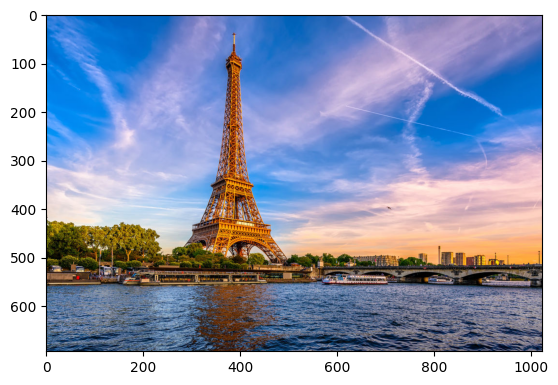

In [80]:
# Tour Eiffel
image_paris = plt.imread("./data/tour-eiffel.png")
plt.imshow(image_paris);

In [81]:
# type
type(image_paris)

numpy.ndarray

In [82]:
# shape
image_paris.shape

(694, 1024, 3)

Les 3 dimensions représentent :
- la hauteur de l'image en pixels, ici 694
- la largeur de l'image en pixels, ici 1024
- les 3 couleurs primaires : rouge, vert, bleu (RVB) :
    - `image_paris[:,:,0]` représente les valeurs de la couleur primaire <span style="color:red">rouge</span>,
    - `image_paris[:,:,1]` représente les valeurs de la couleur primaire <span style="color:green">verte</span>,
    - `image_paris[:,:,2]` représente les valeurs de la couleur primaire <span style="color:blue">bleue</span>.
    
Pour les images, les valeurs sont soit des nombres flottants entre `0.0` et `1.0`, soit des entiers entre `0` et `255` (correspondant à `00` et `FF` en hexadécimal). La valeur `0.0` (ou `0`) correspond à l'absence de couleur. La valeur `1.0` (ou `255`) correspond à l'intensité maximum de couleur). 

Pour afficher une image avec les valeurs de chaque couleur primaire d'une image, il suffit de passer à 0 les valeurs des 2 autres couleurs complémentaires.

In [83]:
# pixel en haut à gauche
image_paris[0, 0]

array([0.16470589, 0.49803922, 0.8509804 ], dtype=float32)

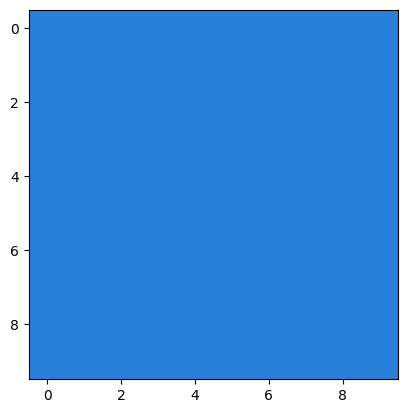

In [84]:
# couleur d'un seul pixel
arr = np.full((10, 10, 3), image_paris[0, 0])
plt.imshow(arr);

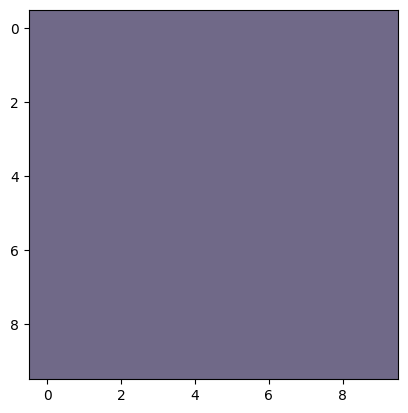

In [86]:
# couleur d'un seul pixel
arr = np.full((10, 10, 3), image_paris[-1, -1])  # 693, 1023
plt.imshow(arr);

**Exercice**
- Comment obtenir le pixel en bas à droite ?
- Déterminez i, j, k, l ci-dessous pour sélectionner uniquement la Tour Eiffel dans l'image
- Passez à 0 successivement l'un des canaux rouge, vert ou bleu et affichez l'image obtenue.
- Cette transformation doit être effectuée sur une copie de l'image, obtenue par la méthode `.copy()`.

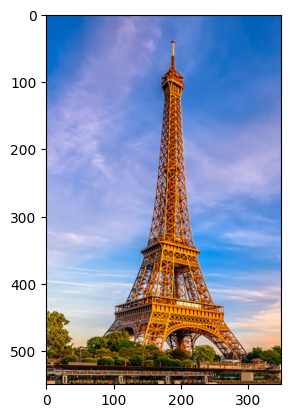

In [89]:
# extraction d'une partie de l'image
i, j = 0, 550
k, l = 200, 550
tour_eiffel = image_paris[i:j, k:l]
plt.imshow(tour_eiffel);

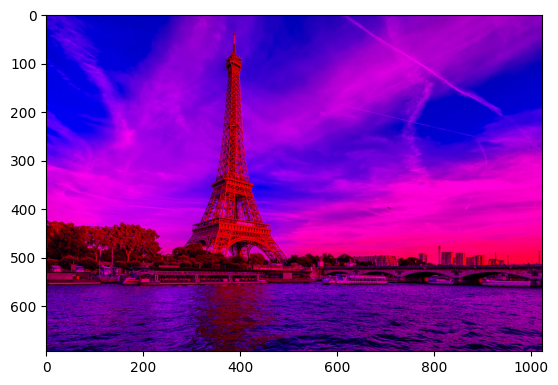

In [95]:
image = image_paris.copy()
image[:, :, 1] = 0
plt.imshow(image);

**Exercice**
- Chargez l'image mystère "./data/devinez.jpg" et l'afficher. Il s'agit d'une photo dans laquelle on a modifié aléatoirement les 2 couleurs vert et bleu.
- Appliquez une transformation simple pour améliorer le rendu de cette photo et devinez ce qu'elle représente.

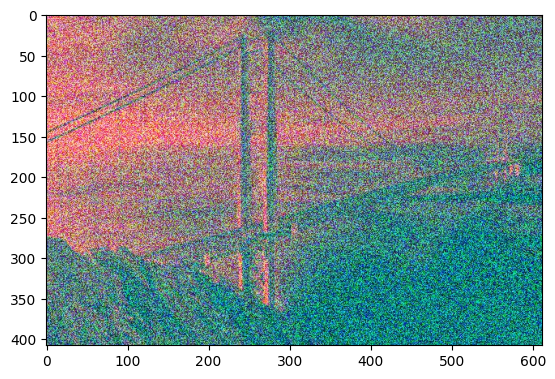

In [96]:
image_mystere = plt.imread("./data/devinez.jpg")
plt.imshow(image_mystere);

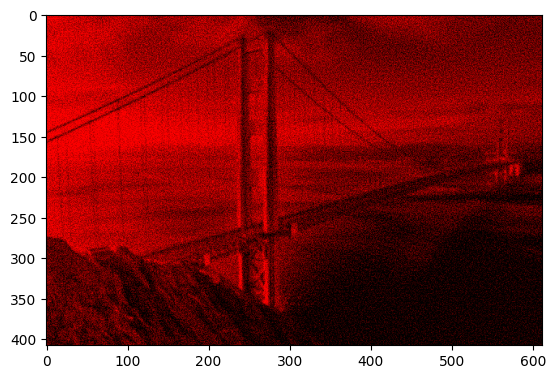

In [101]:
image = image_mystere.copy()
image[:, :, [1, 2]] = 0
plt.imshow(image);

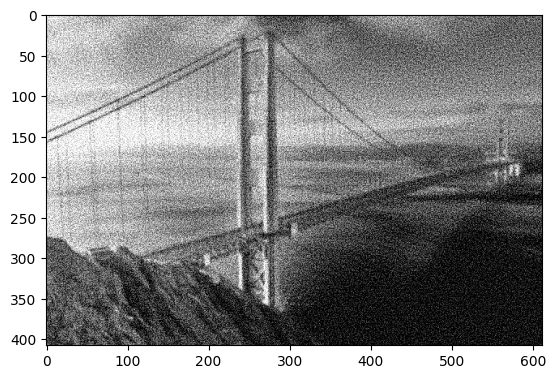

In [104]:
image = image_mystere.copy()
image[:, :, 1] = image[:, :, 0]
image[:, :, 2] = image[:, :, 0]
plt.imshow(image);

**Exercice**
- Chargez l'image "./data/mondrian-1504681_1280.png" et l'afficher.
- La couleur grise peut-être obtenue en égalisant dans chaque pixel les niveaux de rouge, de vert et de bleu. Passez la photo en niveau de gris, ici, en calculant la moyenne des canaux rouge, vert et bleu et en l'affectant aux 3 canaux, toujours sur une copie de l'image.
- En fait, le niveau de gris est calculé en utilisant une moyenne pondérée : $Y=0.2989 \times R + 0.5870 \times G + 0.1140 \times B$. Passez l'image en gris avec cette formule.

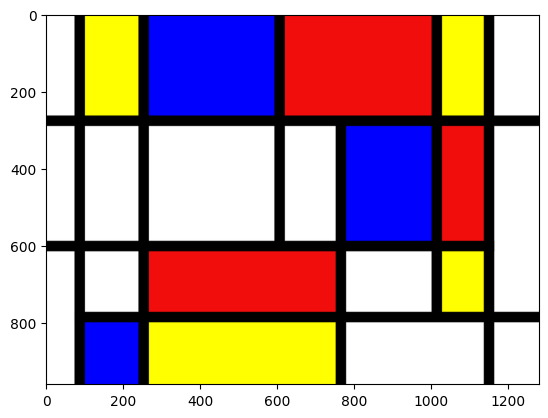

In [116]:
image_mondrian = plt.imread("./data/mondrian-1504681_1280.png")
plt.imshow(image_mondrian);

In [110]:
image_mondrian.shape

(960, 1280, 3)

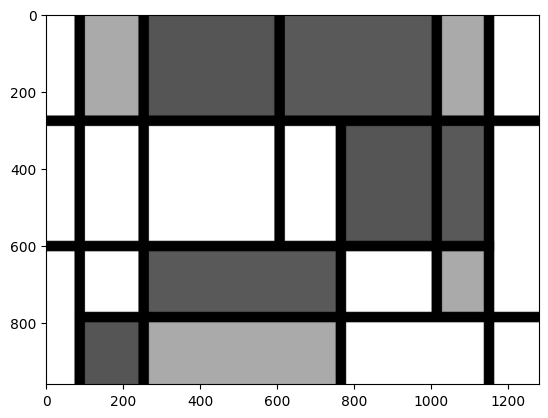

In [117]:
image = image_mondrian.copy()
gris = image.mean(axis=2)
image[:,:,0]=gris
image[:,:,1]=gris
image[:,:,2]=gris
plt.imshow(image);

In [109]:
image.mean(axis=2).shape

(960, 1280)

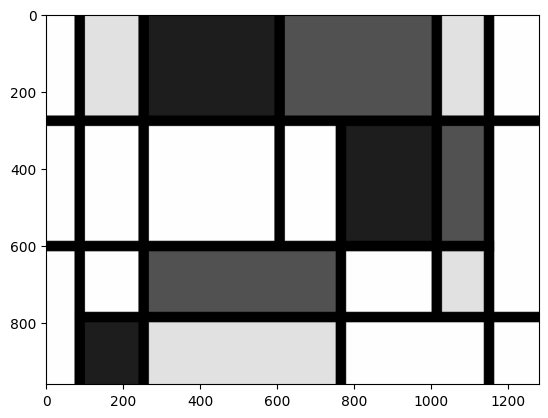

In [118]:
image = image_mondrian.copy()
gris = image @ np.array([0.2989, 0.5870, 0.1140])
image[:,:,0]=gris
image[:,:,1]=gris
image[:,:,2]=gris
plt.imshow(image);

<div class="alert alert-warning">
    <h3><i class="fa fa-book"></i> Documentation</h3>
    <ul>
        <li><strong>NumPy</strong> : <a href="https://numpy.org/doc/stable/index.html">https://numpy.org/doc/stable/index.html</a></li>
        <li><strong>Deep learning on MNIST</strong> : <a href="https://numpy.org/numpy-tutorials/tutorial-deep-learning-on-mnist/">https://numpy.org/numpy-tutorials/tutorial-deep-learning-on-mnist/</a></li>
    </ul>
</div>